<a href="https://colab.research.google.com/github/Naman1232/ML-PROJECTS/blob/main/ML_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Project -Weather Forecast**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01-01-2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01-01-2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01-01-2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
data.shape

(8784, 8)

In [ ]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
data.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [ ]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [ ]:
data.Weather.nunique()

50

In [ ]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [ ]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [ ]:
from itertools import chain
flat_list= list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
def Create_list(x):
  list_of_lists = [w.split() for w in x.split(',')]
  flat_list = list(chain(*list_of_lists))
  return flat_list





def Get_Weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'Snow'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Clear' in list1:
    return 'Clear'
  elif 'Cloudy' in list1:
    return 'Cloudy'
  else:
    return 'RAIN'

In [ ]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [ ]:
data['Std_Weather']= data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,01-01-2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,01-01-2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,01-01-2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
data.Std_Weather.value_counts()

,count
Std_Weather,
Cloudy,3797
Clear,3432
RAIN,603
Snow,556
FOG,241
RAIN+FOG,129
SNOW+RAIN,26


In [ ]:
cloudy_df =data[data['Std_Weather']=='Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [ ]:
clear_df =data[data['Std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

In [ ]:
rain_df =data[data['Std_Weather']=='RAIN']
snow_df =data[data['Std_Weather']=='Snow']

In [ ]:
rain_df.shape

(603, 9)

In [ ]:
snow_df.shape

(556, 9)

In [ ]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
1111,2/16/2012 7:00,1.7,-0.9,83,7,12.9,101.96,Cloudy,Cloudy
7892,11/24/2012 20:00,-0.9,-5.8,69,32,25.0,99.92,Cloudy,Cloudy
1880,3/19/2012 8:00,11.9,9.9,88,7,12.9,101.67,Mostly Cloudy,Cloudy
4663,7/13/2012 7:00,22.5,15.1,63,15,48.3,101.59,Mostly Cloudy,Cloudy
295,1/13/2012 7:00,-5.1,-7.7,82,22,16.1,98.84,Cloudy,Cloudy


In [ ]:
weather_df.shape

(2359, 9)

In [ ]:
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
RAIN,603
Cloudy,600
Clear,600
Snow,556


In [ ]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1111,1.7,-0.9,83,7,12.9,101.96,Cloudy
7892,-0.9,-5.8,69,32,25.0,99.92,Cloudy
1880,11.9,9.9,88,7,12.9,101.67,Cloudy
4663,22.5,15.1,63,15,48.3,101.59,Cloudy
295,-5.1,-7.7,82,22,16.1,98.84,Cloudy


In [ ]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Std_Weather,0


In [ ]:
weather_df.dtypes

,0
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Std_Weather,object


In [ ]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.402374,1.312463,72.185672,16.523103,23.200170,100.804799
std,11.324535,10.520135,16.000751,9.461598,12.770584,0.921365
min,-22.800000,-28.000000,18.000000,0.000000,0.600000,97.520000
25%,-3.300000,-7.100000,61.000000,9.000000,16.100000,100.290000
50%,5.200000,0.300000,75.000000,15.000000,24.100000,100.830000
75%,16.100000,10.300000,85.000000,22.000000,25.000000,101.390000
max,32.800000,23.100000,100.000000,70.000000,48.300000,103.630000


In [ ]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [ ]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.941879,-0.234799,-0.138201,0.370996,-0.105172
Dew Point Temp_C,0.941879,1.000000,0.099169,-0.127253,0.159932,-0.214592
Rel Hum_%,-0.234799,0.099169,1.000000,0.046038,-0.658233,-0.332150
Wind Speed_km/h,-0.138201,-0.127253,0.046038,1.000000,-0.141471,-0.396913
Visibility_km,0.370996,0.159932,-0.658233,-0.141471,1.000000,0.321393
Press_kPa,-0.105172,-0.214592,-0.332150,-0.396913,0.321393,1.000000


<Axes: >

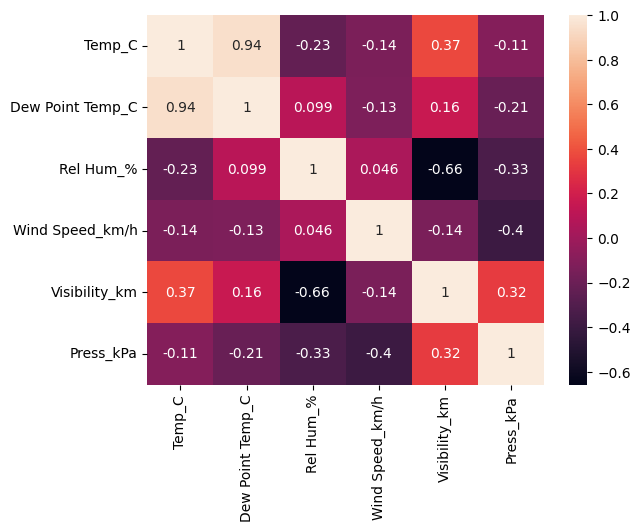

In [ ]:
sns.heatmap(cor_matrix, annot= True)

In [ ]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

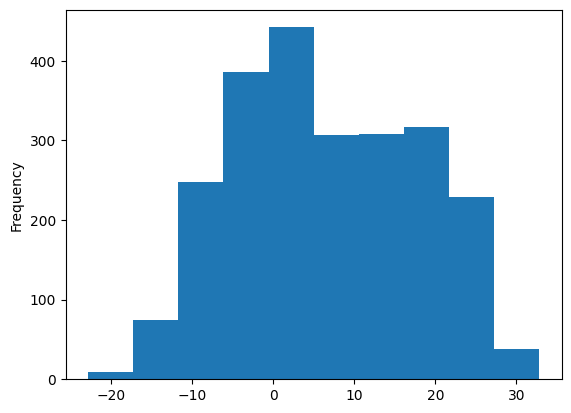

In [ ]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

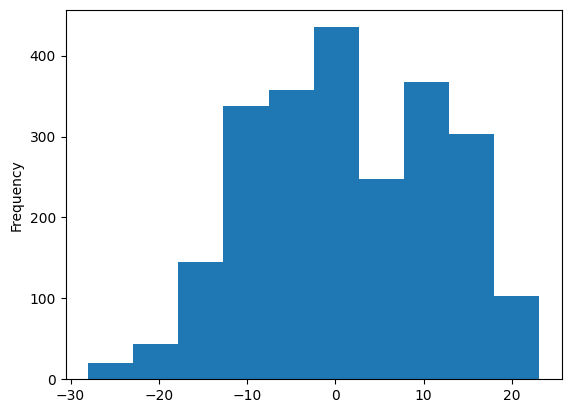

In [ ]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

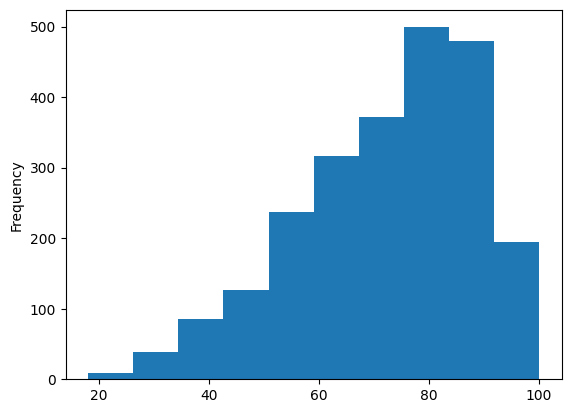

In [ ]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

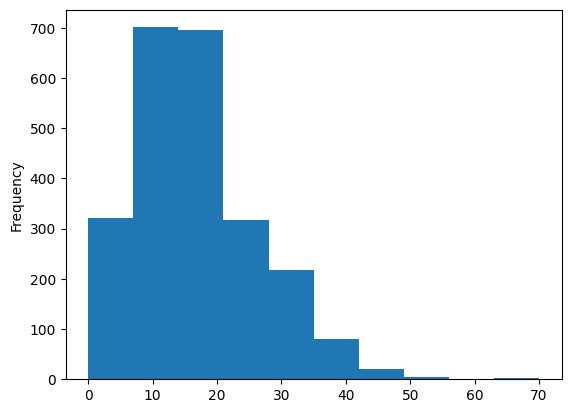

In [ ]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

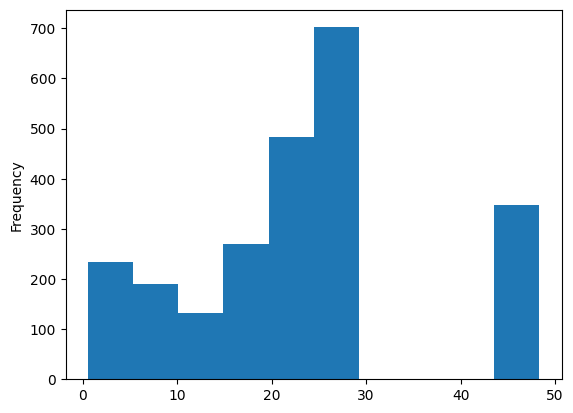

In [ ]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

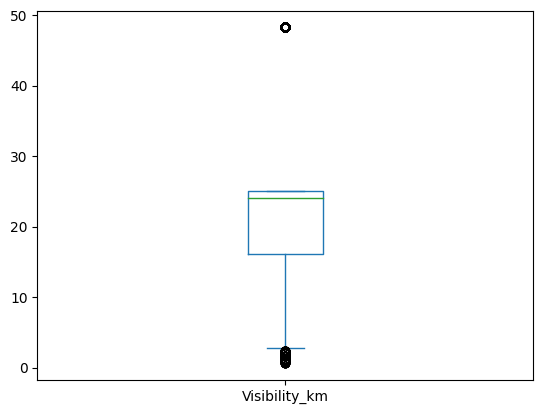

In [ ]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: >

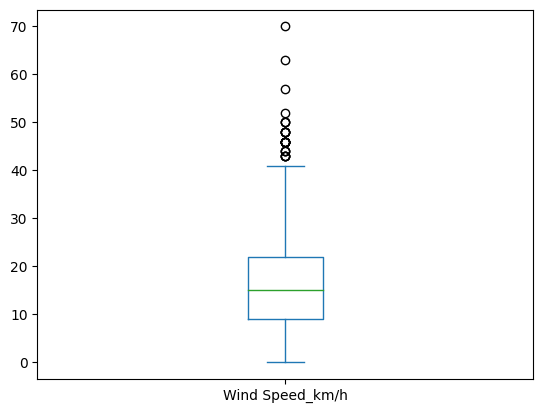

In [ ]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1111,1.7,-0.9,83,7,12.9,101.96,Cloudy
7892,-0.9,-5.8,69,32,25.0,99.92,Cloudy
1880,11.9,9.9,88,7,12.9,101.67,Cloudy
4663,22.5,15.1,63,15,48.3,101.59,Cloudy
295,-5.1,-7.7,82,22,16.1,98.84,Cloudy


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_Encoder = LabelEncoder()

In [ ]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [ ]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'Snow'], dtype=object)

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1111,1.7,-0.9,83,7,12.9,101.96,1
7892,-0.9,-5.8,69,32,25.0,99.92,1
1880,11.9,9.9,88,7,12.9,101.67,1
4663,22.5,15.1,63,15,48.3,101.59,1
295,-5.1,-7.7,82,22,16.1,98.84,1


In [ ]:
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
2,603
1,600
0,600
3,556


In [ ]:
X=weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
1111,1.7,-0.9,83,7,12.9,101.96
7892,-0.9,-5.8,69,32,25.0,99.92
1880,11.9,9.9,88,7,12.9,101.67
4663,22.5,15.1,63,15,48.3,101.59
295,-5.1,-7.7,82,22,16.1,98.84
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [ ]:
y= weather_df['Std_Weather']
y

,Std_Weather
1111,1
7892,1
1880,1
4663,1
295,1
...,...
8779,3
8780,3
8781,3
8782,3


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler= StandardScaler()

In [ ]:
X_std= std_scaler.fit_transform(X)
X_std

array([[-0.41532574, -0.21035205,  0.67600708, -1.00671389, -0.80672531,
         1.25405932],
       [-0.64496442, -0.67622428, -0.19913736,  1.63610612,  0.14096552,
        -0.96051652],
       [ 0.48556446,  0.81646838,  0.98855866, -1.00671389, -0.80672531,
         0.93924216],
       ...,
       [-0.6096354 , -0.26739763,  1.30111025,  1.21325492, -1.44112991,
        -0.92794922],
       [-0.58313862, -0.29592042,  1.05106898,  1.21325492, -1.05735428,
        -0.97137228],
       [-0.56547411, -0.32444321,  0.86353803,  1.42468052, -0.9320398 ,
        -0.99308381]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((1887, 6), (472, 6))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model =DecisionTreeClassifier()

In [ ]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt= decision_tree_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.5847457627118644

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       118
           1       0.44      0.42      0.43       128
           2       0.65      0.64      0.65       126
           3       0.72      0.73      0.72       100

    accuracy                           0.58       472
   macro avg       0.59      0.59      0.59       472
weighted avg       0.58      0.58      0.58       472



<Axes: >

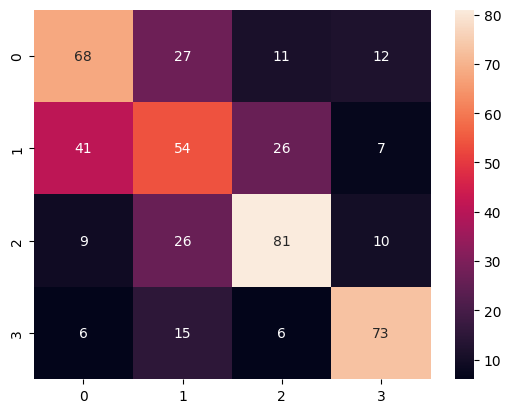

In [ ]:
cm= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [ ]:
model_list = [dt_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [ ]:
acc_list=[]
for model in model_list:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_list.append(acc)

In [ ]:
acc_list

[0.5847457627118644,
 0.663135593220339,
 0.6016949152542372,
 0.635593220338983,
 0.5847457627118644,
 0.5911016949152542]

In [ ]:
model_df=pd.DataFrame({'Model':model_list,"Accuracy":acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.584746
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.663136
2,SVC(),0.601695
3,KNeighborsClassifier(),0.635593
4,LogisticRegression(),0.584746
5,GaussianNB(),0.591102


In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rf_model,X_std,y,cv=5,scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.56779661 0.63347458 0.625      0.59110169 0.6985138 ]


In [ ]:
scores.mean()

0.6231773363561122

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
parameters={
    'n_estimators':[50,100],
     'max_features':['sqrt','log2',None]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model,param_grid=parameters)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [ ]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [ ]:
Random_forest_model_new=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=100)

In [ ]:
Random_forest_model_new.fit(x_train,y_train)
y_pred_rf=Random_forest_model_new.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.6610169491525424

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1111,1.7,-0.9,83,7,12.9,101.96,1
7892,-0.9,-5.8,69,32,25.0,99.92,1
1880,11.9,9.9,88,7,12.9,101.67,1
4663,22.5,15.1,63,15,48.3,101.59,1
295,-5.1,-7.7,82,22,16.1,98.84,1


In [ ]:
Temp=float(input('Enter the Temp_C ='))
dpt=float(input('Enter the Dew Point Temp_C ='))
rh=float(input('Enter the Relative humidity % ='))
ws=float(input('Enter the Wind Speed ='))
vs=float(input('Enter the Visibility_km ='))
pr=float(input('Enter the Pressure kpa ='))

Enter the Temp_C =31
Enter the Dew Point Temp_C =25
Enter the Relative humidity % =74
Enter the Wind Speed =7
Enter the Visibility_km =20
Enter the Pressure kpa =100


In [ ]:
input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
if prediction[0]==0:
  print('Weather is Clear')
elif prediction[0]==1:
    print('Weather is Cloudy')
elif prediction[0]==2:
    print('Weather is Rainy')
else:
    print('Weather is Snowy')

Weather is Rainy
